# **Assignment : Anime Recommended System**

- 62010278 ณัฐพนธ์ สุขถาวร 
- 62010497 นิธิ น้อมประวัติ 
- 62010609 พักตร์ภูมิ ตาแพร่ 
- 62010948 สิรวิชญ์ สุขวัฒนาวิทย์ 

## **Import Libraries**

In [243]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Global Config**

In [244]:
sns.set_theme(style="whitegrid", palette="pastel")


class CONFIG:
    PLT_FIG_SIZE = plt.figaspect(8/19)


# color codes for python build-in print function
class PRINT_COLOR_CODE:
    BLUE = '\033[94m'
    CYAN = '\033[96m'
    GREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC = '\033[0m'


## **Define Util Functions**

In [245]:
# function to return list of columns which contained Nan value
def get_cols_contained_na(df):
    masked_na_df = df.isna()
    cols_with_na = df.columns[masked_na_df.any()].tolist()
    return cols_with_na


## **Import Datasets**

In [246]:
ANIME_CSV_PATH = "./datasets/anime.csv"
RATING_CSV_PATH = "./datasets/rating.csv"


In [247]:
anime_df = pd.read_csv(ANIME_CSV_PATH)
anime_df.rename(columns={'rating': 'average_rating'}, inplace=True)

rating_df = pd.read_csv(RATING_CSV_PATH)
rating_df.rename(columns={'rating': 'user_rating'}, inplace=True)

rating_merged_df = rating_df.merge(anime_df, on='anime_id', how='inner')

# NOTE : Careful of big file size
# rating_merged_df.to_csv('./dataExplores/rating_merged_anime.csv', index=False,  encoding='utf-8')


## **Data Exploration (1)**

### 1. **Anime Dataframe** Basic Info.

In [248]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(anime_df)}{PRINT_COLOR_CODE.ENDC}')

anime_df



List of columns that contain NaN values : ['genre', 'type', 'average_rating']


,anime_id,name,genre,type,episodes,average_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


,anime_id,average_rating,members
count,12294.0,12064.0,12294.0
mean,14058.2,6.5,18071.3
std,11455.3,1.0,54820.7
min,1.0,1.7,5.0
25%,3484.2,5.9,225.0
50%,10260.5,6.6,1550.0
75%,24794.5,7.2,9437.0
max,34527.0,10.0,1013917.0


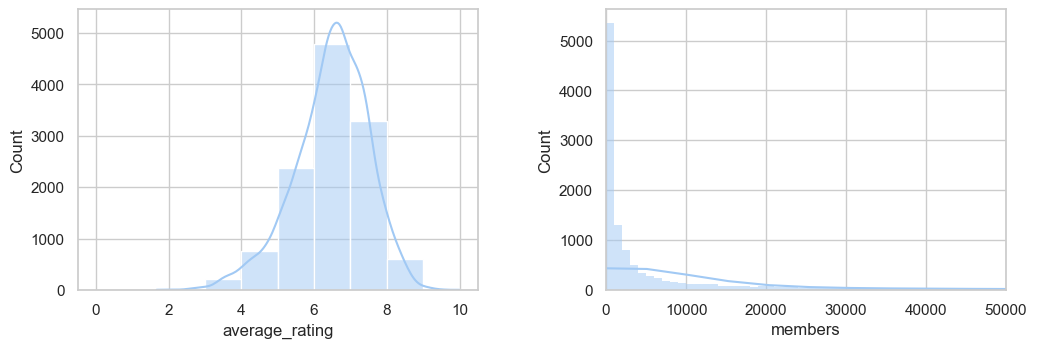

In [249]:
fig, axs = plt.subplots(ncols=2, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(anime_df, x='average_rating', kde=True, binwidth=1, binrange=[0, 10], ax=axs[0])

sns.histplot(anime_df, x='members', kde=True, binwidth=1e3, ax=axs[1])
axs[1].set(xlim=(0, 0.05e6))

anime_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))


### 2. **Rating Dataframe** Basic info.

In [250]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(rating_df)}{PRINT_COLOR_CODE.ENDC}')

rating_df


List of columns that contain NaN values : []


,user_id,anime_id,user_rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


,user_id,anime_id,user_rating
count,7813737.0,7813737.0,7813737.0
mean,36728.0,8909.1,6.1
std,20997.9,8883.9,3.7
min,1.0,1.0,-1.0
25%,18974.0,1240.0,6.0
50%,36791.0,6213.0,7.0
75%,54757.0,14093.0,9.0
max,73516.0,34519.0,10.0


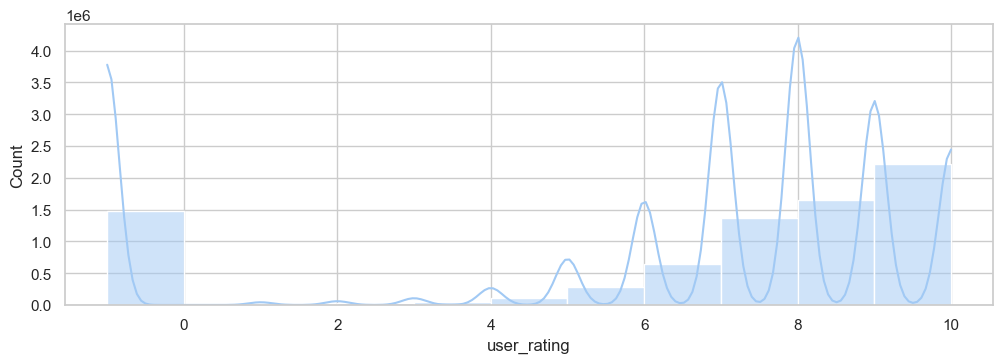

In [251]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(rating_df, x='user_rating', kde=True, binwidth=1, binrange=[-1, 10], ax=axs)

rating_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

### 3. **Rating Merged Dataframe** Basic info.

In [252]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(rating_merged_df)}{PRINT_COLOR_CODE.ENDC}')

rating_merged_df.sort_values(by=['user_id', 'anime_id'])



List of columns that contain NaN values : ['genre', 'type', 'average_rating']


,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
25925,1,24,-1,School Rumble,"Comedy, Romance, School, Shounen",TV,26,8.06,178553
33078,1,79,-1,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24,7.31,158772
40190,1,226,-1,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511
67696,1,241,-1,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11,6.69,84395
...,...,...,...,...,...,...,...,...,...
1474883,73515,16512,7,Devil Survivor 2 The Animation,"Action, Demons, Supernatural",TV,13,7.06,101266
6640957,73515,17187,9,Ghost in the Shell: Arise - Border:1 Ghost Pain,"Mecha, Police, Psychological, Sci-Fi",Movie,1,7.64,31747
4153140,73515,22145,10,Kuroshitsuji: Book of Circus,"Comedy, Demons, Fantasy, Historical, Shounen, ...",TV,10,8.37,122895
4055601,73516,790,9,Ergo Proxy,"Mystery, Psychological, Sci-Fi",TV,23,8.03,265005


In [253]:
rating_merged_df.groupby(by='type').count().sort_values(by='user_id', ascending=False).rename(columns={'user_id': 'count'})[['count']]


,count
type,
TV,5283596
Movie,1051998
OVA,800307
Special,559366
ONA,91956
Music,26500


,user_id,rated_anime_count
count,73515.0,73515.0
mean,36758.4,106.3
std,21222.5,153.1
min,1.0,1.0
25%,18379.5,18.0
50%,36758.0,57.0
75%,55137.5,136.0
max,73516.0,10226.0


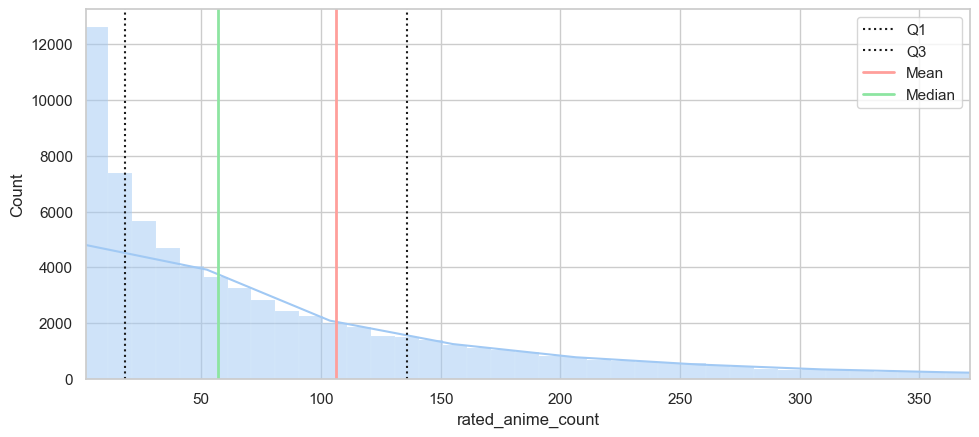

In [254]:
count_rated_by_user_df = rating_merged_df.groupby(['user_id'])[['anime_id']].count().sort_values(by='anime_id').rename(columns={'anime_id': 'rated_anime_count'}).reset_index()

fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)

sns.histplot(count_rated_by_user_df, x='rated_anime_count', binwidth=10,  kde=True, ax=axs)
axs.set(xlim=(count_rated_by_user_df['rated_anime_count'].quantile(0.05), count_rated_by_user_df['rated_anime_count'].quantile(0.95)))
axs.axvline(count_rated_by_user_df['rated_anime_count'].quantile(0.25), color='k', linestyle='dotted', linewidth=1.5, label='Q1')
axs.axvline(count_rated_by_user_df['rated_anime_count'].quantile(0.75), color='k', linestyle='dotted', linewidth=1.5, label='Q3')
axs.axvline(count_rated_by_user_df['rated_anime_count'].mean(), color='r', linestyle='-', linewidth=2, label='Mean')
axs.axvline(count_rated_by_user_df['rated_anime_count'].median(), color='g', linestyle='-', linewidth=2, label='Median')
axs.legend()

count_rated_by_user_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

## **Data Cleansing (1)**

In Anime DataFrame, drop all anime types except `TV`

In [255]:
type_except_list = ["TV"] # FIXME : TUNING ME!!!

print(f"{PRINT_COLOR_CODE.FAIL}drop all anime types except {PRINT_COLOR_CODE.GREEN}{type_except_list}{PRINT_COLOR_CODE.ENDC}")

new_anime_df = anime_df[anime_df['type'].isin(type_except_list)]

drop_count = len(anime_df)-len(new_anime_df)
drop_percentage = (drop_count/len(anime_df))*100

print(f"{PRINT_COLOR_CODE.FAIL}drop {PRINT_COLOR_CODE.WARNING}{drop_count}{PRINT_COLOR_CODE.ENDC} {PRINT_COLOR_CODE.FAIL}rows{PRINT_COLOR_CODE.ENDC} ({drop_percentage:.4f}%)")

anime_df = new_anime_df

anime_df.reset_index(drop=True, inplace=True)
anime_df


drop all anime types except ['TV']
drop 8507 rows (69.1964%)


,anime_id,name,genre,type,episodes,average_rating,members
0,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
1,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
2,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
3,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
4,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
...,...,...,...,...,...,...,...
3782,34522,"Wake Up, Girls! Shin Shou","Drama, Music",TV,Unknown,NaN,381
3783,34467,Yami Shibai 4th Season,"Dementia, Horror, Supernatural",TV,Unknown,NaN,1838
3784,32615,Youjo Senki,"Magic, Military",TV,Unknown,NaN,6652
3785,34284,Yuuki Yuuna wa Yuusha de Aru: Washio Sumi no Shou,"Drama, Fantasy, Magic, Slice of Life",TV,6,NaN,2593


In Anime DataFrame, drop less than `{{min_n_members_threshold}}` members anime

In [256]:
min_n_members_threshold = 225  # FIXME : TUNING ME!!!

print(f"{PRINT_COLOR_CODE.FAIL}drop less than {PRINT_COLOR_CODE.WARNING}{min_n_members_threshold}{PRINT_COLOR_CODE.ENDC} {PRINT_COLOR_CODE.FAIL}members anime{PRINT_COLOR_CODE.ENDC}")

new_anime_df = anime_df[anime_df['members'] >= min_n_members_threshold]

drop_count = len(anime_df)-len(new_anime_df)
drop_percentage = (drop_count/len(anime_df))*100

print(f"{PRINT_COLOR_CODE.FAIL}drop {PRINT_COLOR_CODE.WARNING}{drop_count}{PRINT_COLOR_CODE.ENDC} {PRINT_COLOR_CODE.FAIL}rows{PRINT_COLOR_CODE.ENDC} ({drop_percentage:.4f}%)")

anime_df = new_anime_df

anime_df.reset_index(drop=True, inplace=True)
anime_df


drop less than 225 members anime
drop 643 rows (16.9791%)


,anime_id,name,genre,type,episodes,average_rating,members
0,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
1,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
2,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
3,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
4,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
...,...,...,...,...,...,...,...
3139,34522,"Wake Up, Girls! Shin Shou","Drama, Music",TV,Unknown,NaN,381
3140,34467,Yami Shibai 4th Season,"Dementia, Horror, Supernatural",TV,Unknown,NaN,1838
3141,32615,Youjo Senki,"Magic, Military",TV,Unknown,NaN,6652
3142,34284,Yuuki Yuuna wa Yuusha de Aru: Washio Sumi no Shou,"Drama, Fantasy, Magic, Slice of Life",TV,6,NaN,2593


join (inner) Rating Dataframe with Anime Dataframe `again`

In [257]:
rating_merged_df = rating_df.merge(anime_df, on='anime_id', how='inner')

rating_merged_df

,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
5282680,48766,23555,-1,Neko no Dayan,"Kids, Magic",TV,52,5.38,297
5282681,48766,23737,-1,Neko Pitcher,"Comedy, Kids, Sports",TV,51,7.13,308
5282682,48766,27621,-1,Glass no Kamen Desu ga to Z,"Comedy, Parody",TV,14,6.02,273
5282683,48766,27943,-1,Nano Invaders,"Action, Adventure, Shounen, Super Power",TV,52,7.08,519


## **Data Exploration (2)**

### 1. **Rating Merged Dataframe** Basic Info.

In [258]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(rating_merged_df)}{PRINT_COLOR_CODE.ENDC}')

rating_merged_df


List of columns that contain NaN values : []


,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
5282680,48766,23555,-1,Neko no Dayan,"Kids, Magic",TV,52,5.38,297
5282681,48766,23737,-1,Neko Pitcher,"Comedy, Kids, Sports",TV,51,7.13,308
5282682,48766,27621,-1,Glass no Kamen Desu ga to Z,"Comedy, Parody",TV,14,6.02,273
5282683,48766,27943,-1,Nano Invaders,"Action, Adventure, Shounen, Super Power",TV,52,7.08,519


,user_id,anime_id,user_rating,average_rating,members
count,5282685.0,5282685.0,5282685.0,5282685.0,5282685.0
mean,36602.5,9669.5,6.4,7.7,230966.2
std,21050.4,9241.6,3.6,0.6,202046.4
min,1.0,1.0,-1.0,3.2,225.0
25%,18776.0,1535.0,6.0,7.4,81109.0
50%,36350.0,6880.0,8.0,7.8,171452.0
75%,54759.0,15583.0,9.0,8.2,317513.0
max,73516.0,33775.0,10.0,9.3,1013917.0


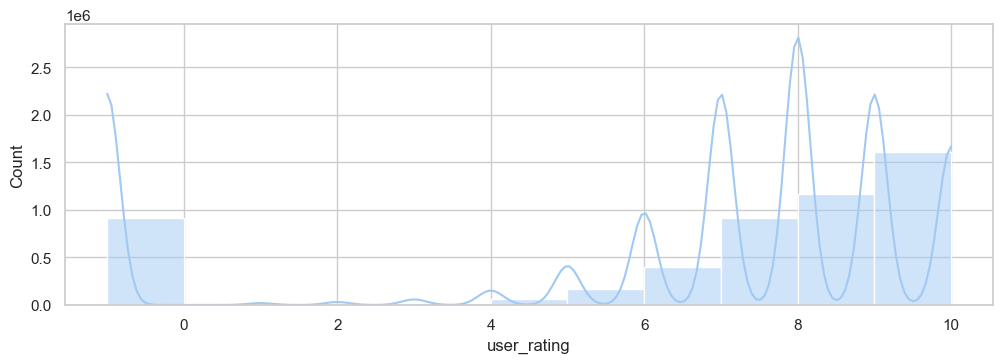

In [259]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(rating_merged_df, x='user_rating', kde=True, binwidth=1, binrange=[-1, 10], ax=axs)

rating_merged_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))


### 2. Compare **Anime Dataframe** vs **Rating Merged Dataframe**

In [260]:
rating_merged_droped_unrated_user_df = rating_merged_df.drop(rating_merged_df[rating_merged_df['user_rating'] < 0].index)

compare_anime_vs_rating_merged_df = rating_merged_droped_unrated_user_df.groupby(['anime_id']).agg({
    'members': 'mean',
    'user_id': 'count',
    'average_rating': 'mean',
    'user_rating': 'mean',
})
compare_anime_vs_rating_merged_df.rename(
    columns={
        'user_id': 'rating_merged: members (cal)',
        'user_rating': 'rating_merged: average_rating (cal)',
        'members': 'anime: members',
        'average_rating': 'anime: average_rating'
    },
    inplace=True)

print(f'{PRINT_COLOR_CODE.WARNING}Anime Dataframe vs Rating Merged Dataframe (droped users who have not rated anime){PRINT_COLOR_CODE.ENDC}\n')
print(f'{PRINT_COLOR_CODE.CYAN}Anime Dataframe{PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{anime_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')
print(f'{PRINT_COLOR_CODE.CYAN}Rating Merged Dataframe (droped users who have not rated anime){PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{compare_anime_vs_rating_merged_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')

compare_anime_vs_rating_merged_df


Anime Dataframe vs Rating Merged Dataframe (droped users who have not rated anime)

Anime Dataframe contains 3144 unique animes
Rating Merged Dataframe (droped users who have not rated anime) contains 2891 unique animes


,anime: members,rating_merged: members (cal),anime: average_rating,rating_merged: average_rating (cal)
anime_id,,,,
1,486824.0,13449,8.82,8.869433
6,283069.0,9385,8.32,8.419393
7,64905.0,2169,7.36,7.533426
8,9848.0,308,7.06,7.198052
15,83648.0,2002,8.08,8.299700
...,...,...,...,...
33274,5117.0,6,5.82,7.166667
33341,9248.0,89,6.68,6.764045
33394,3414.0,22,3.91,4.454545


## **Data Cleansing (2)**

~~In Rating Merged DataFrame, replace all instances of `user_rating` with `average_rating` for rows where user_rating == -1 (unrated anime).~~

In [261]:
# rating_merged_df['user_rating'] = rating_merged_df.apply(lambda x: x['user_rating'] if x['user_rating'] > -1 else x['average_rating'], axis=1)

# rating_merged_df.reset_index(drop=True, inplace=True)
# rating_merged_df


In Rating Merged DataFrame, replace all instances of `user_rating` with `np.nan` for rows where user_rating == -1 (unrated anime).

In [262]:
rating_merged_df['user_rating'].replace({-1: np.nan}, inplace=True)


---

## **Recommended System (Collaborative filtering)**

### 1. **Import Libraries**

In [263]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix


### 2. **Implmenting Core**

In [264]:
rating_merged_limit_df = rating_merged_df[rating_merged_df.user_id <= 1000]

In [265]:
user_anime_matrix = rating_merged_limit_df.pivot_table(index=['user_id'], columns=['name'], values='user_rating')

user_anime_matrix

name,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,009-1,07-Ghost,11eyes,12-sai.: Chicchana Mune no Tokimeki,3 Choume no Tama: Uchi no Tama Shirimasenka?,30-sai no Hoken Taiiku,91 Days,...,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,ef: A Tale of Melodies.,ef: A Tale of Memories.,gdgd Fairies,gdgd Fairies 2,iDOLM@STER Xenoglossia,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [266]:
norm_user_anime_matrix = user_anime_matrix.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

norm_user_anime_matrix.fillna(0, inplace=True)

norm_user_anime_matrix


name,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,009-1,07-Ghost,11eyes,12-sai.: Chicchana Mune no Tokimeki,3 Choume no Tama: Uchi no Tama Shirimasenka?,30-sai no Hoken Taiiku,91 Days,...,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,ef: A Tale of Melodies.,ef: A Tale of Memories.,gdgd Fairies,gdgd Fairies 2,iDOLM@STER Xenoglossia,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-0.100213,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.304424,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.251132,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [267]:
norm_anime_user_matrix = norm_user_anime_matrix.T

norm_anime_user_matrix

# norm_anime_user_matrix = norm_anime_user_matrix.loc[:, (norm_anime_user_matrix != 0).any(axis=0)]

user_id,1,2,3,5,7,8,9,10,11,12,...,991,992,993,994,995,996,997,998,999,1000
name,,,,,,,,,,,,,,,,,,,,,
.hack//Roots,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//Sign,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//Tasogare no Udewa Densetsu,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
07-Ghost,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gdgd Fairies 2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iDOLM@STER Xenoglossia,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s.CRY.ed,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [268]:
anime_user_csr = csr_matrix(norm_anime_user_matrix.values)

In [269]:
item_similarity = cosine_similarity(anime_user_csr)
item_sim_df = pd.DataFrame(item_similarity, index=norm_anime_user_matrix.index, columns=norm_anime_user_matrix.index)

item_sim_df

name,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,009-1,07-Ghost,11eyes,12-sai.: Chicchana Mune no Tokimeki,3 Choume no Tama: Uchi no Tama Shirimasenka?,30-sai no Hoken Taiiku,91 Days,...,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,ef: A Tale of Melodies.,ef: A Tale of Memories.,gdgd Fairies,gdgd Fairies 2,iDOLM@STER Xenoglossia,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei
name,,,,,,,,,,,,,,,,,,,,,
.hack//Roots,1.000000,0.112184,0.073350,0.0,0.290120,0.014801,0.0,0.000000,0.423657,-0.161920,...,0.024114,0.025200,-0.023729,0.030476,0.0,0.0,0.000000,0.008737,0.021289,0.018210
.hack//Sign,0.112184,1.000000,0.167341,0.0,-0.023299,0.011527,0.0,0.000000,0.124681,-0.005366,...,-0.000948,-0.016313,-0.038325,0.017708,0.0,0.0,0.000000,0.030638,0.015531,-0.014805
.hack//Tasogare no Udewa Densetsu,0.073350,0.167341,1.000000,0.0,0.068207,0.021071,0.0,0.000000,0.000000,-0.044584,...,-0.029660,0.147304,-0.078377,-0.070338,0.0,0.0,0.000000,0.000000,-0.005158,0.018253
009-1,0.000000,0.000000,0.000000,1.0,0.000000,0.033580,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
07-Ghost,0.290120,-0.023299,0.068207,0.0,1.000000,0.073241,0.0,-0.091726,0.213846,-0.074351,...,0.069367,0.157306,-0.044097,-0.048488,0.0,0.0,0.050822,0.079828,0.001489,-0.025922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gdgd Fairies 2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,-0.151350,...,0.000000,0.000000,0.000000,-0.102978,1.0,1.0,0.000000,0.000000,0.000000,0.000000
iDOLM@STER Xenoglossia,0.000000,0.000000,0.000000,0.0,0.050822,0.027719,0.0,0.000000,0.000000,-0.289775,...,0.000000,0.000000,-0.050213,0.013067,0.0,0.0,1.000000,0.000000,0.068860,0.014299
s.CRY.ed,0.008737,0.030638,0.000000,0.0,0.079828,-0.023808,0.0,0.000000,0.045619,-0.023003,...,0.196521,-0.004153,0.000956,0.000846,0.0,0.0,0.000000,1.000000,-0.074448,-0.090108


In [270]:
user_similarity = cosine_similarity(anime_user_csr.T)
user_sim_df = pd.DataFrame(user_similarity, index=norm_user_anime_matrix.index, columns=norm_user_anime_matrix.index)

user_sim_df

user_id,1,2,3,5,7,8,9,10,11,12,...,991,992,993,994,995,996,997,998,999,1000
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,1.000000,0.063993,0.167627,0.020365,0.0,0.125977,0.045233,0.108629,...,-0.100180,0.003374,0.010638,0.092243,0.151488,0.115758,0.009442,0.058378,0.101146,0.033284
5,0.0,0.0,0.063993,1.000000,0.072457,0.016326,0.0,0.031464,0.005347,0.094016,...,0.018029,0.059467,0.063634,-0.004209,0.062436,0.050171,0.068498,0.044720,0.057878,-0.027970
7,0.0,0.0,0.167627,0.072457,1.000000,-0.013548,0.0,0.020401,-0.015157,0.061591,...,0.037284,0.003331,0.028922,0.087153,0.022212,0.116270,0.127160,0.000000,0.049932,0.055785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.0,0.0,0.115758,0.050171,0.116270,0.054932,0.0,0.006370,0.000494,0.000666,...,0.009824,0.002318,0.143582,0.063423,0.027043,1.000000,0.083858,0.006891,0.012853,0.023562
997,0.0,0.0,0.009442,0.068498,0.127160,-0.032703,0.0,0.416781,-0.129757,0.134834,...,0.268791,-0.000379,0.082047,0.197245,0.112987,0.083858,1.000000,0.000000,0.181129,-0.013998
998,0.0,0.0,0.058378,0.044720,0.000000,-0.028708,0.0,0.000000,0.000000,-0.004799,...,0.000000,0.005641,-0.020282,-0.023379,0.081500,0.006891,0.000000,1.000000,-0.015345,-0.046471


In [271]:
def get_rating_by_user_anime(user_id, anime_name):
    watched_anime = user_anime_matrix.loc[user_id]
    watched_anime = pd.DataFrame({
        'name': watched_anime.index,
        'rating': watched_anime.values
    })
    watched_anime.fillna(0, inplace=True)
    
    return watched_anime[watched_anime['name'] == anime_name]['rating'].values[0]

In [272]:
def get_watched_rating_mean_by_user(user_id):
    watched_anime = user_anime_matrix.loc[user_id]
    watched_anime = pd.DataFrame({
        'name': watched_anime.index,
        'rating': watched_anime.values
    })
    watched_anime.dropna(inplace=True)
    
    mean = watched_anime['rating'].sum() / watched_anime['rating'].size
    
    return mean

In [273]:
def pred_user_based(user_id, anime_name):
    watched_anime = user_anime_matrix.loc[user_id]
    watched_anime = pd.DataFrame({
        'name': watched_anime.index,
        'rating': watched_anime.values
    })
    watched_anime.dropna(inplace=True)
    r_mean = get_watched_rating_mean_by_user(user_id)
    
    sim_users = user_sim_df.sort_values(by=user_id, ascending=False)[user_id][1:11]
    sim_users = pd.DataFrame({
        'user_id': sim_users.index,
        'sim': sim_users.values
    })
    sum_sim_users = sim_users['sim'].sum()
    
    sum_mean_users = 0
    for idx, row in sim_users.iterrows():
        mean_user = get_watched_rating_mean_by_user(row['user_id'])
        sum_mean_users += row['sim'] * (get_rating_by_user_anime(row['user_id'], anime_name) - mean_user)
    
    return r_mean + (sum_mean_users/sum_sim_users)

In [274]:
def user_base(user_id):
    anime_score = []
    for i in item_sim_df.index.values:
        score = pred_user_based(user_id, i)
        anime_score.append([i, score])
    anime_score_df = pd.DataFrame(anime_score, columns=['name', 'score'])
    sorted_anime_score_df = anime_score_df.sort_values(by=['score'], ascending=False)
    return sorted_anime_score_df

In [275]:
recomend_anime = user_base(100)

/var/folders/j0/tshgp2c155g7dhqg2_j7sxr00000gn/T/ipykernel_87361/2184478207.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sim_users = user_sim_df.sort_values(by=user_id, ascending=False)[user_id][1:11]


In [276]:
recomend_anime.head(10)

,name,score
675,Highschool of the Dead,6.714943
346,Death Note,5.912589
465,Fullmetal Alchemist,5.692750
466,Fullmetal Alchemist: Brotherhood,5.548326
63,Angel Beats!,4.657037
1315,Ouran Koukou Host Club,4.571935
1574,Shingeki no Kyojin,4.493143
458,Fruits Basket,4.385893
430,Eureka Seven,3.761459
260,Chobits,3.703685


### 5. **Evaluation**

In [277]:
user_id = 3

#### 5.1. **Evaluation** using **Top-K Precision**

In [278]:
def top_k_precision(user_id, k=10):
    return len(set.intersection(
        *[set(recomend_anime['name'].head(k)), set(rating_merged_df[rating_merged_df['user_id']==user_id]["name"])]))/float(k)

In [279]:
top_k_precision(user_id)

0.4

#### 5.2. **Evaluation** using **AUC**

In [280]:
def auc_precision(user_id):  
    cb_anime_actual_interect_df = recomend_anime[recomend_anime["name"].isin(rating_merged_df[rating_merged_df['user_id']==user_id]['name'])].copy()
    cb_anime_not_interect_df = recomend_anime[~recomend_anime["name"].isin(rating_merged_df[rating_merged_df['user_id']==user_id]['name'])].copy()
    
    auc_score = 0
    
    n = len(cb_anime_actual_interect_df) * len(cb_anime_not_interect_df)
    
    cb_anime_actual_interect_df['n_prime'] = cb_anime_actual_interect_df.apply(
        lambda x: len(cb_anime_not_interect_df[x['score'] > cb_anime_not_interect_df['score']]), axis=1)
    cb_anime_actual_interect_df['n_prime_2'] = cb_anime_actual_interect_df.apply(
        lambda x: len(cb_anime_not_interect_df[x['score'] == cb_anime_not_interect_df['score']]), axis=1)

    n_prime = cb_anime_actual_interect_df['n_prime'].sum()
    n_prime_2 = cb_anime_actual_interect_df['n_prime_2'].sum()

    auc_score = (n_prime + (0.5 * n_prime_2)) / n
    print(
        f'auc_score : {auc_score:.4f} (n = {n}, n\' = {n_prime} , n\" = {n_prime_2}) (actual_interect : {len(cb_anime_actual_interect_df)}, not_interect : {len(cb_anime_not_interect_df)})'
    )

In [281]:
auc_precision(user_id)

auc_score : 0.6963 (n = 132549, n' = 59373 , n" = 65845) (actual_interect : 69, not_interect : 1921)
